### Practicle 11
### Statistical Foundation of Data Sciences
### Divyanshi Bhandari
### GF202344105
### Submitted To- Anitya Sir

Detected Solar Cycle Peaks (Using 13-month average):


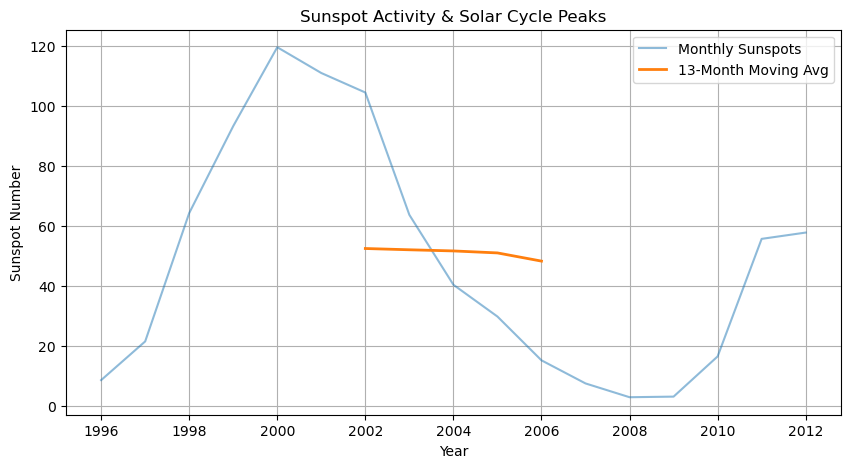

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# SAMPLE SUNSPOT DATA 
# -----------------------------
data = {
    "Year": [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
             2006, 2007, 2008, 2009, 2010, 2011, 2012],
    "Sunspots": [8.6, 21.5, 64.3, 93.3, 119.6, 111.0, 104.5, 63.7,
                 40.4, 29.8, 15.2, 7.5, 2.9, 3.1, 16.5, 55.7, 57.8]
}

df = pd.DataFrame(data)

# -----------------------------
# 13-MONTH MOVING AVERAGE
# -----------------------------
df["MA_13"] = df["Sunspots"].rolling(window=13, center=True).mean()

# -----------------------------
# PEAK DETECTION (solar maxima)
# -----------------------------
peaks = []
for i in range(1, len(df)-1):
    if df["MA_13"][i] > df["MA_13"][i-1] and df["MA_13"][i] > df["MA_13"][i+1]:
        peaks.append((df["Year"][i], df["MA_13"][i]))

# -----------------------------
# PRINT RESULTS
# -----------------------------
print("Detected Solar Cycle Peaks (Using 13-month average):")
for year, value in peaks:
    print(f"Year: {year}, Sunspot Number: {round(value, 2)}")

# -----------------------------
# PLOT RESULTS
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sunspots"], label="Monthly Sunspots", alpha=0.5)
plt.plot(df["Year"], df["MA_13"], label="13-Month Moving Avg", linewidth=2)

# Mark peaks
for year, value in peaks:
    plt.scatter(year, value, color='red')
    plt.text(year, value+5, f"{year}", color="red", ha="center")

plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title("Sunspot Activity & Solar Cycle Peaks")
plt.legend()
plt.grid(True)
plt.show()
